In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
def load_data(val_size=5000):
    train = pd.read_csv("sign_mnist_train.csv")
    test = pd.read_csv("sign_mnist_test.csv")
    y_tr = train["label"]
    x_tr = train.iloc[:,1:]
    y_t = test["label"]
    x_t = test.iloc[:,1:]
    i = np.random.randint(y_tr.shape[0]+1, size=val_size)
    y_v = y_tr.take(i) 
    x_v = x_tr.take(i)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

In [3]:
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

In [4]:
print(x_tr.shape, x_v.shape, x_t.shape)

(27455, 784) (5000, 784) (7172, 784)


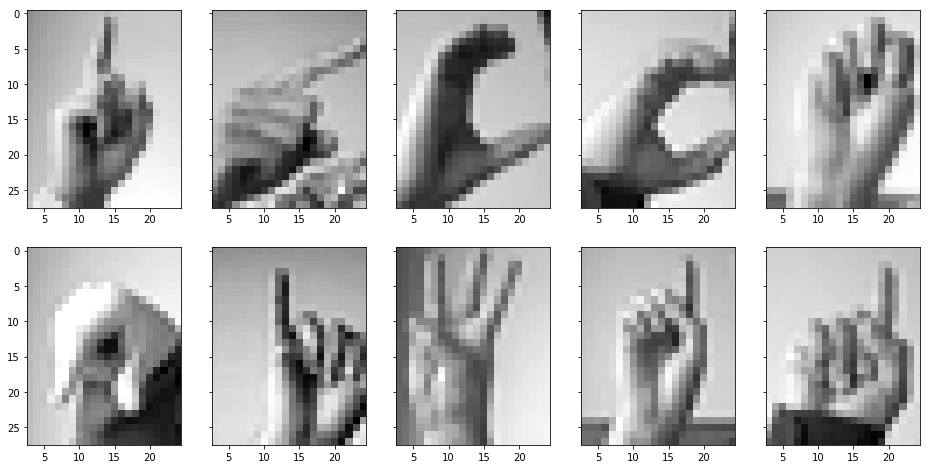

In [5]:
f, axes = plt.subplots(2,5, sharey = True)
f.set_size_inches(16,8)
for i in range(0,10):
    axes[int(i/5)][int(i%5)].imshow(x_tr.values[i].reshape(28,28), cmap="gray")

In [6]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
x_tr_mm = mm_scaler.fit_transform(x_tr)
x_v_mm = mm_scaler.transform(x_v)
x_t_mm = mm_scaler.transform(x_t)

In [7]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
x_tr_s = s_scaler.fit_transform(x_tr)
x_v_s = s_scaler.transform(x_v)
x_t_s = s_scaler.transform(x_t)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D
from keras.optimizers import SGD, RMSprop
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV

In [30]:
def create_model_1(units=1, activation="relu", init="uniform", optimizer="sgd", lr=0.01):
    model = Sequential()
    model.add(Dense(units, input_dim=784, kernel_initializer=init, activation=activation))
    model.add(Dense(25, kernel_initializer=init, activation="softmax"))
    if optimizer=="sgd":
        opt = SGD(lr=lr)
    else:
        opt = RMSprop(lr=lr)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [31]:
# CELDA DE EJECUCIÓN LENTA
clf = KerasClassifier(build_fn=create_model_1, verbose=0)
units = [1,25,50,100]
inits = ["uniform", "glorot_uniform", "ones"]
activations = ["sigmoid", "relu"]
optimizers = ["sgd", "rmsprop"]
lrs = [0.1,0.01,0.001]
epochs = [30,50,100]
param_grid = dict(optimizer=optimizers, units=units, activation=activations, init=inits, lr=lrs, epochs=epochs)

grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=2)
grid_result = grid.fit(x_v_mm, to_categorical(y_v))

KeyboardInterrupt: 

In [ ]:
# SI LA CELDA ANTERIOR NO SE EJECUTO, TAMPOCO EJECUTAR
for (k,v) in grid_result.best_params_.items():
    if k=="lam" and grid_result.best_params_["regularizer"]==None:
        continue
    print("{:<20}".format(k), v)
print("{:<20}".format("MODEL SCORE "), grid_result.best_score_)